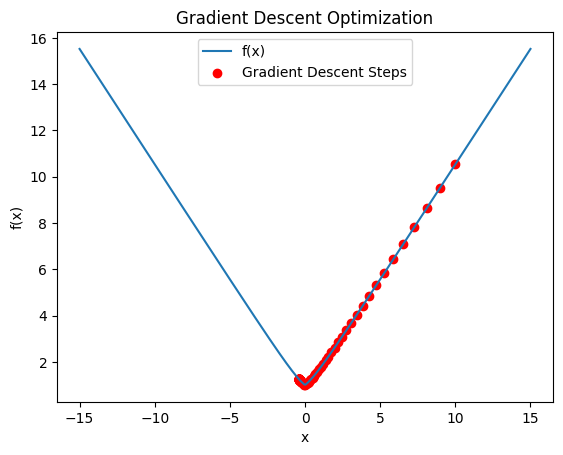

Optymalne theta: -0.40020749387593874


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(f, grad_f, theta_init, learning_rate, iterations):
    theta = theta_init
    history = [theta]
    for i in range(iterations):
        theta -= learning_rate * grad_f(theta)
        history.append(theta)
    return theta, history

# Definicja funkcji i jej pochodnej
f = lambda x: np.sqrt(np.abs(x) + 1 + x**2)
grad_f = lambda x: (0.5 * (2*x + 1/np.sqrt(np.abs(x) + 1 + x**2)))

# Parametry
theta_init = 10.0
learning_rate = 0.1
iterations = 100

# Optymalizacja
optimal_theta, history = gradient_descent(f, grad_f, theta_init, learning_rate, iterations)

# Wizualizacja
x = np.linspace(-15, 15, 400)
y = f(x)

plt.plot(x, y, label='f(x)')
plt.scatter(history, f(np.array(history)), color='red', label='Gradient Descent Steps')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent Optimization')
plt.show()

print("Optymalne theta:", optimal_theta)


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Wczytanie danych California Housing
california = fetch_california_housing()
X, y = california.data, california.target

# Przekształcenie jednej cechy (np. standaryzacja)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Podział na dane treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Budowa modelu
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Warstwa wyjściowa
])

# Kompilacja
model.compile(optimizer='adam', loss='mse')

# Trening
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Ocena modelu
loss = model.evaluate(X_test, y_test)
print("Strata na danych testowych:", loss)


Epoch 1/100


c:\Users\szymo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.5865 - val_loss: 0.4615
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3997 - val_loss: 0.4267
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3872 - val_loss: 0.4439
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3895 - val_loss: 0.3734
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3286 - val_loss: 0.3685
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3171 - val_loss: 0.3444
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3217 - val_loss: 0.3446
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3102 - val_loss: 0.3332
Epoch 9/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2952 - val_loss: 0.3341
Epoch 10/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2892 - val_loss: 0.3311
Epoch 11/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2971 - val_loss: 0.3199
Epoch 12/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical

# Wczytanie danych CIFAR-100
(X_train, y_train), (X_test, y_test) = cifar100.load_data()
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

# Budowa modelu
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(100, activation='softmax')
])

# Kompilacja
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Trening
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

# Ocena modelu
loss, accuracy = model.evaluate(X_test, y_test)
print("Strata na danych testowych:", loss)
print("Dokładność na danych testowych:", accuracy)


169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


c:\Users\szymo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.0200 - loss: 8.9081 - val_accuracy: 0.0584 - val_loss: 4.2730
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.0795 - loss: 4.1209 - val_accuracy: 0.1158 - val_loss: 3.9113
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 32ms/step - accuracy: 0.1401 - loss: 3.7364 - val_accuracy: 0.1450 - val_loss: 3.8003
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.2176 - loss: 3.3101 - val_accuracy: 0.1634 - val_loss: 3.6641
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.3041 - loss: 2.8781 - val_accuracy: 0.1950 - val_loss: 3.5932
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 30ms/step - accuracy: 0.4101 - loss: 2.3665 - val_accuracy: 0.2132 - val_loss: 3.8154
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.5191 - loss: 1.8705 - val_accuracy: 0.2120 - val_loss: 4.1251
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.6266 - loss: 1.4187 - 